In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from math import radians, cos, sin, asin, sqrt, ceil, floor

In [23]:
data= pd.read_json('/content/drive/MyDrive/Colab Notebooks/Web-Science/geoLondonAug2020-1', lines=True)

In [24]:
data.shape

(1731, 14)

In [25]:
data.head(5)

,_id,date,username,text,geoenabled,coordinates,location,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source
0,1289290528475906049,{'$date': '2020-07-31T20:03:10Z'},markjg65,Sunset to die for \n\n#sunset #sunsetphotograp...,True,"{'type': 'Point', 'coordinates': [-0.0936, 51....","London, England","Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...","[sunset, sunsetphotography, summervibes, summe...",[],Instagram
1,1289290621782380544,{'$date': '2020-07-31T20:03:32Z'},willwpw,This months LUSH Kitchen Subscription box is h...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",London,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[LushKitchen],Instagram
2,1289290626538672128,{'$date': '2020-07-31T20:03:33Z'},_AndreaUrbanFoX,Beautiful sky over #bethnalgreen tonight. #Eas...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",stab city,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[bethnalgreen, EastLondon, sunset, heatwave, s...",[],Instagram
3,1289290647669637120,{'$date': '2020-07-31T20:03:38Z'},_JOSSCARTER_,VERY happy to finally see the sun go down. Tod...,True,"{'type': 'Point', 'coordinates': [-0.109400000...","London, England","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
4,1289290936648781824,{'$date': '2020-07-31T20:04:47Z'},JoFreemanMakeup,"𝙷𝚊𝚙𝚙𝚢 𝙵𝚛𝚒𝚈𝚊𝚢 𝙱𝚎𝚊𝚞𝚝𝚒𝚎𝚜 , 𝚑𝚘𝚠 𝚑𝚊𝚜 𝚢𝚘𝚞𝚛 𝚠𝚎𝚎𝚔 𝚋𝚎𝚎𝚗...",True,"{'type': 'Point', 'coordinates': [-0.109400000...","Here, there & everywhere. . .","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[FriYayFaves],[],Instagram


In [26]:
data.columns

Index(['_id', 'date', 'username', 'text', 'geoenabled', 'coordinates',
       'location', 'place_name', 'place_country', 'country_code',
       'place_coordinates', 'hashtags', 'mentions', 'source'],
      dtype='object')

In [27]:
data['coordinates'].head(1)[0]

{'coordinates': [-0.0936, 51.4544], 'type': 'Point'}

In [28]:
#given London coordinates
london_coordinates_0 = [-0.563, 51.261318]
london_coordinates_1 = [0.28036, 51.686031]

#latitude
y1 = 51.261318 
y2 = 51.686031

#longitude
x1 = -0.563 
x2 = 0.28036 

# Calculate the great circle distance between two points on the earth (specified in decimal degrees)

def haversine_distance(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    l1, la1, l2, la2 = map(radians, [lon1, lat1, lon2, lat2])
    # Radius of earth in kilometers. 
    R = 6371 
    # haversine formula 
    delta_l = l2 - l1 
    delta_la = la2 - la1 
    a = sin(delta_la/2) ** 2 + cos(la1) * cos(la2) * sin(delta_l/2) ** 2
    c = 2 * asin(sqrt(a)) 
    
    return c * R

horizontal_dist = haversine_distance(x1, y1, x2, y1)
vertical_dist = haversine_distance(x1, y1,  x1, y2) 

In [29]:
cols = ceil(horizontal_dist)
rows = ceil(vertical_dist)

grid = np.zeros((rows, cols), dtype=int)
print(grid.shape)

(48, 59)


In [30]:
# Assigning grid point 

def grid_point(l, la):
  
    horizontal_dist = ceil(haversine_distance(x1, y1, l, y1))
    vertical_dist = ceil(haversine_distance(x1, y1, x1, la))
    grid[vertical_dist][horizontal_dist] = grid[vertical_dist][horizontal_dist] + 1

for x in data['coordinates']:
    l = x['coordinates'][0]
    la = x['coordinates'][1]
    grid_point(l, la)

In [31]:
print(grid.shape)

(48, 59)


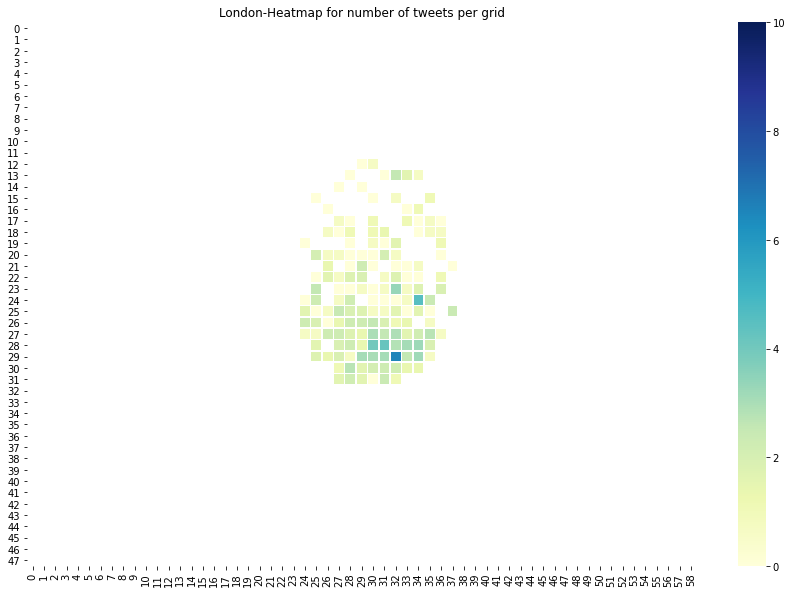

In [36]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15,10))
np.set_printoptions(threshold=10000)
ax = sns.heatmap(np.log(grid) , cmap="YlGnBu", yticklabels=True, xticklabels=True, vmin = 0, vmax=10, linewidths=0.5)
plt.title('London-Heatmap for number of tweets per grid')
plt.show()

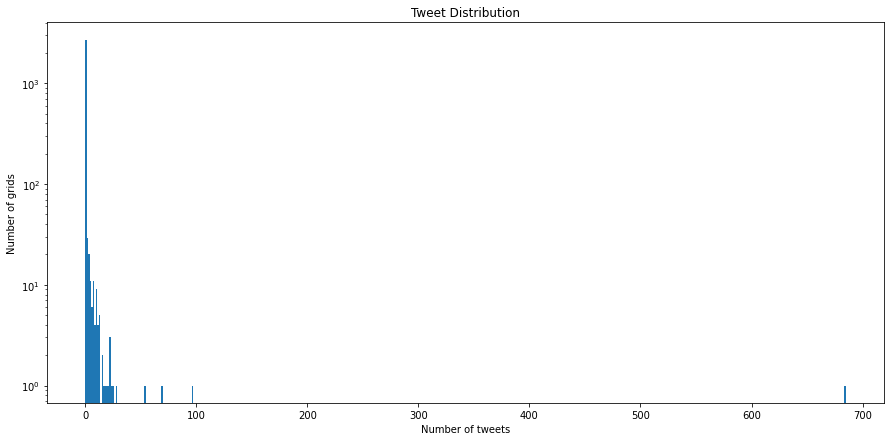

In [38]:
plt.figure(figsize=(15, 7))
plt.xlabel("Number of tweets")
plt.ylabel("Number of grids")
plt.hist(grid.flatten(), log=True, bins=500)
plt.title('Tweet Distribution')
plt.show()